In [22]:
%pip install pennylane

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Task 1: Create a Bell State Circuit
Build a quantum circuit that generates the Bell state



Use 2 qubits

Use qml.probs() to display the probability distribution

Bonus: visualize the statevector or show measurement samples

In [23]:
dev_analytic = qml.device('default.qubit',wires=2)
dev_sample = qml.device('default.qubit',wires=2, shots=1000)

In [24]:
@qml.qnode(dev_analytic)
def circuit():
  qml.Hadamard(wires=[0])
  qml.CNOT(wires=[0,1])
  return [qml.probs(), qml.state()]

@qml.qnode(dev_sample)
def circuit_sample():
  qml.Hadamard(wires=[0])
  qml.CNOT(wires=[0,1])
  return qml.sample(wires=[0,1])

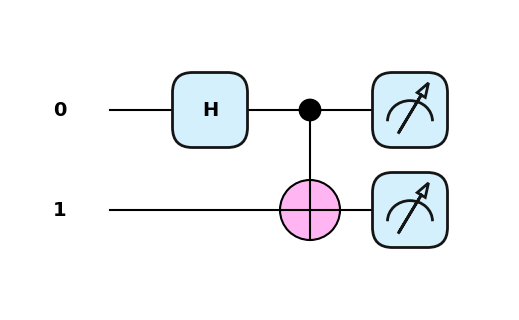

In [25]:
qml.draw_mpl(circuit,style='pennylane')();

In [26]:
q_prob, q_state = circuit()

print("Probability Distribution:")
print(q_prob)
print("Bell Statevector:")
print(q_state)

Probability Distribution:
[0.5 0.  0.  0.5]
Bell Statevector:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [27]:
samples = circuit_sample()

unique, counts = np.unique(samples, axis=0, return_counts=True)

print("Sampled Measurement Outcomes:")
for u, c in zip(unique, counts):
    print(f"{u} -> {c} times")

Sampled Measurement Outcomes:
[0 0] -> 489 times
[1 1] -> 511 times


# Task 2: Build a GHZ State for 3 Qubits
Construct a circuit that prepares a 3-qubit GHZ state:

Use Hadamard and CNOT gates

Measure using qml.probs(wires=[0, 1, 2])

Optional: extend to 4 qubits

In [28]:
#Using 3 qubits
dev_analytic = qml.device('default.qubit',wires=3)

In [29]:
@qml.qnode(dev_analytic)
def circuit():
  qml.Hadamard(wires=[0])
  qml.CNOT(wires=[0,1])
  qml.CNOT(wires=[0,2])
  return qml.probs()

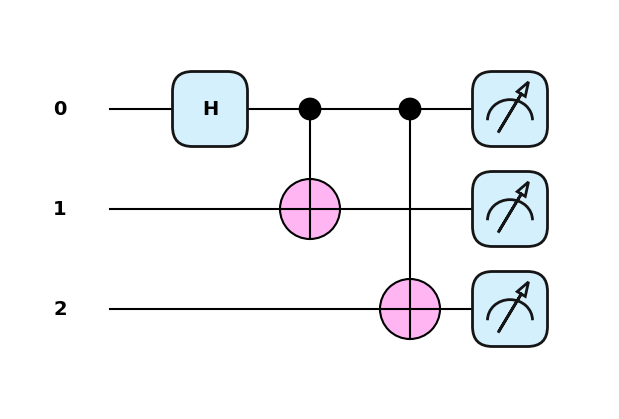

In [30]:
qml.draw_mpl(circuit,style='pennylane')();

In [31]:
circuit()

array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

In [32]:
#Using 4 qubits
dev_analytic = qml.device('default.qubit',wires=4)

In [33]:
@qml.qnode(dev_analytic)
def circuit():
  qml.Hadamard(wires=[0])
  qml.CNOT(wires=[0,1])
  qml.CNOT(wires=[0,2])
  qml.CNOT(wires=[0,3])
  return qml.probs()

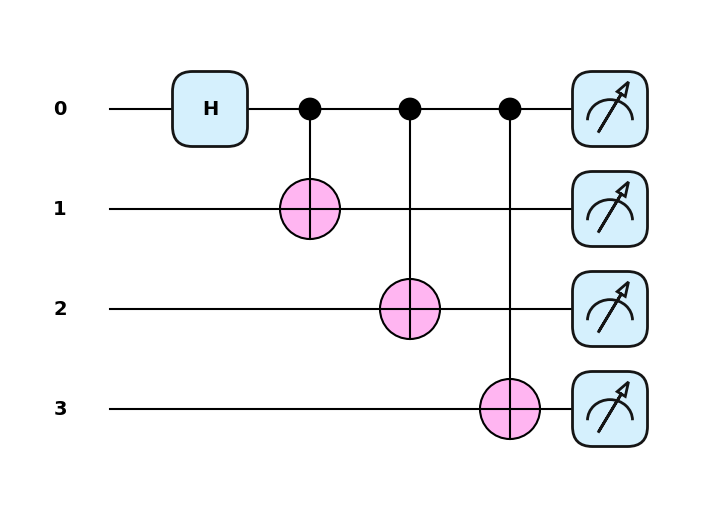

In [34]:
qml.draw_mpl(circuit,style='pennylane')();

In [35]:
circuit()

array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.5])

# Task 3: Rotation + Measurement Circuit
Design a single-qubit rotation circuit using RX, RY, or RZ gates.

Make the rotation angle a variable input

Return the expectation value of PauliZ

Plot how the output changes as you vary the input angle



In [36]:
# Device with 1 qubit and analytic mode
dev = qml.device("default.qubit", wires=1)

# Define the quantum circuit with a variable angle
@qml.qnode(dev)
def rotation_circuit(theta):
    qml.RY(theta, wires=0)  # You can also try RX or RZ here
    return qml.expval(qml.PauliZ(wires=0))

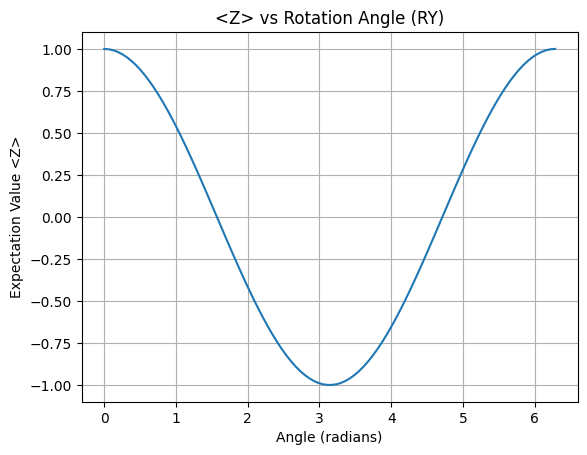

In [37]:
# Sweep over a range of angles from 0 to 2π
angles = np.linspace(0, 2 * np.pi, 100)
expectations = [rotation_circuit(angle) for angle in angles]

# Plot
plt.plot(angles, expectations)
plt.title("<Z> vs Rotation Angle (RY)")
plt.xlabel("Angle (radians)")
plt.ylabel("Expectation Value <Z>")
plt.grid(True)
plt.show()

## Task 4: Simple Variational Optimization
Create a cost function that depends on a gate parameter, and optimize it using PennyLane’s gradient descent optimizer.

Use a rotation gate like RX, and minimize expval(PauliZ)

Log or print cost at each step

Output the optimal parameter found

plot the cost function curve

In [38]:
# Device with 1 qubit and analytic mode
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

def cost_fn(x):
  return circuit(x)

opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Initialize the parameter
theta = np.array(0.5, requires_grad=True)
steps = 60
costs = []

for i in range(steps):
    theta = opt.step(cost_fn, theta)
    c = cost_fn(theta)
    costs.append(c)
    print(f"Step {i+1:02d}: theta = {theta:.4f}  cost = {c:.4f}")

Step 01: theta = 0.5479  cost = 0.8536
Step 02: theta = 0.6000  cost = 0.8253
Step 03: theta = 0.6565  cost = 0.7921
Step 04: theta = 0.7175  cost = 0.7534
Step 05: theta = 0.7833  cost = 0.7086
Step 06: theta = 0.8539  cost = 0.6571
Step 07: theta = 0.9292  cost = 0.5984
Step 08: theta = 1.0094  cost = 0.5324
Step 09: theta = 1.0940  cost = 0.4589
Step 10: theta = 1.1828  cost = 0.3783
Step 11: theta = 1.2754  cost = 0.2911
Step 12: theta = 1.3711  cost = 0.1984
Step 13: theta = 1.4691  cost = 0.1015
Step 14: theta = 1.5686  cost = 0.0022
Step 15: theta = 1.6686  cost = -0.0976
Step 16: theta = 1.7681  cost = -0.1960
Step 17: theta = 1.8662  cost = -0.2911
Step 18: theta = 1.9618  cost = -0.3811
Step 19: theta = 2.0543  cost = -0.4649
Step 20: theta = 2.1428  cost = -0.5413
Step 21: theta = 2.2269  cost = -0.6100
Step 22: theta = 2.3061  cost = -0.6708
Step 23: theta = 2.3803  cost = -0.7239
Step 24: theta = 2.4493  cost = -0.7698
Step 25: theta = 2.5131  cost = -0.8089
Step 26: theta

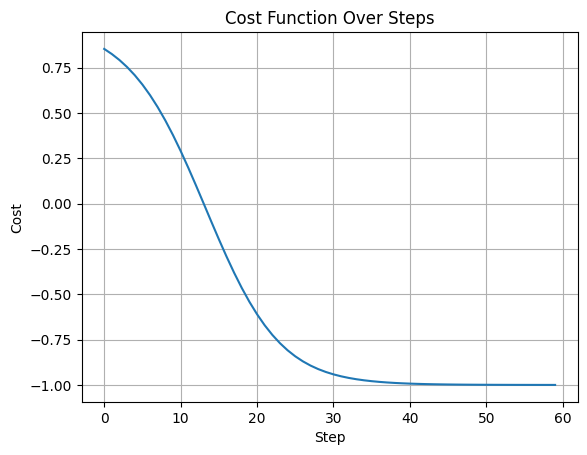

In [39]:
# plot the cost function
plt.plot(costs)
plt.title("Cost Function Over Steps")
plt.xlabel("Step")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


# Task 5: Measurement Comparison
Build a 1- or 2-qubit circuit and compare results from:

qml.probs()

qml.sample()

qml.expval()

Explain how they differ in output and when you'd use each.

Discuss why probs() is deterministic but sample() is random.

In [40]:
# Devices
dev_analytic = qml.device("default.qubit", wires=1, shots=None)      # For probs & expval
dev_sampling = qml.device("default.qubit", wires=1, shots=1000)      # For sample

# 1. Probabilities
@qml.qnode(dev_analytic)
def circuit_probs(theta):
    qml.RY(theta, wires=0)
    return qml.probs(wires=0)

# 2. Expectation Value
@qml.qnode(dev_analytic)
def circuit_expval(theta):
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

# 3. Sample Measurements
@qml.qnode(dev_sampling)
def circuit_sample(theta):
    qml.RY(theta, wires=0)
    return qml.sample(wires=0)


In [41]:
angles = np.linspace(0, np.pi, 100)

probs_0 = []
probs_1 = []
expvals = []
samples_means = []

for theta in angles:
    probs = circuit_probs(theta)
    exp = circuit_expval(theta)
    samples = circuit_sample(theta)

    probs_0.append(probs[0])
    probs_1.append(probs[1])
    expvals.append(exp)
    samples_means.append(np.mean(samples))  # Estimate of ⟨Z⟩ from sampling


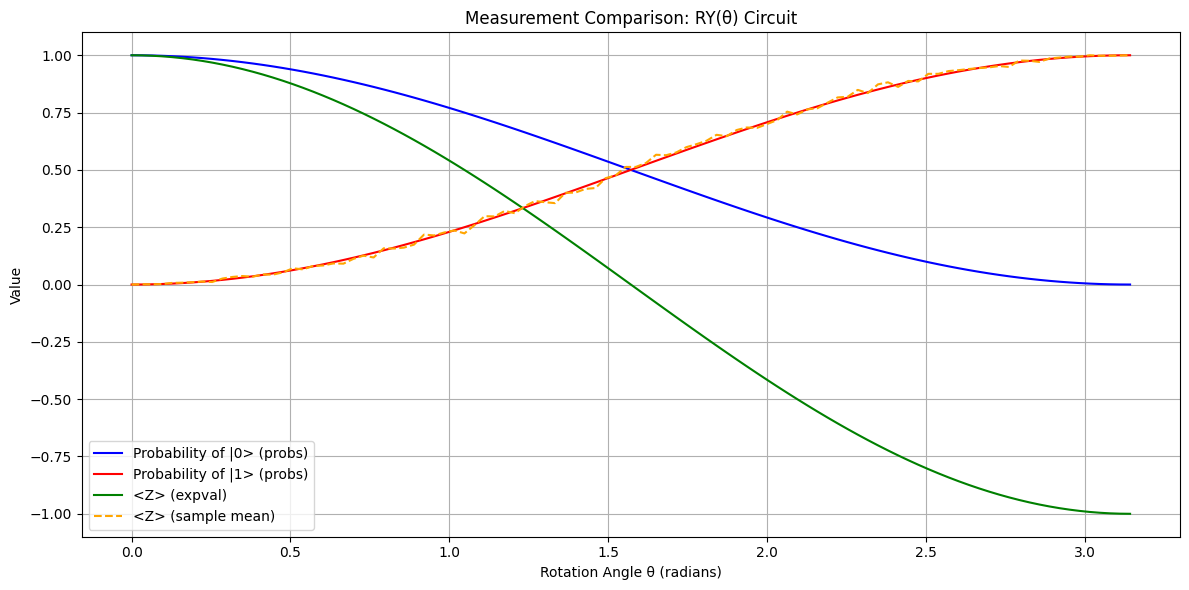

In [42]:
plt.figure(figsize=(12, 6))

# Probabilities
plt.plot(angles, probs_0, label='Probability of |0> (probs)', color='blue')
plt.plot(angles, probs_1, label='Probability of |1> (probs)', color='red')

# Expectation values
plt.plot(angles, expvals, label='<Z> (expval)', color='green')

# Sampled averages (Z)
plt.plot(angles, samples_means, '--', label='<Z> (sample mean)', color='orange')

plt.title("Measurement Comparison: RY(θ) Circuit")
plt.xlabel("Rotation Angle θ (radians)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🧠 **Summary of What We See Here**

* **`qml.probs()`**: Smooth, exact probability curves of being in |0> or |1>
* **`qml.expval()`**: Smooth cosine-shaped < Z > values
* **`qml.sample()`**: Bumpy version of expval — because it's **averaged random samples**

